<img src="https://www.projectcubicle.com/wp-content/uploads/2022/04/Ethical-Problem-of-Artificial-Intelligence-4.jpg"><br>
# <center><strong><font color=orange> Utilizando a Biblioteca PyCaret para Prever Pre√ßos de A√ß√µes </font></strong></center>

## <strong>Introdu√ß√£o</strong><br>

Este desafio teve como objetivo principal empregar t√©cnicas avan√ßadas de aprendizado de m√°quina (machine learning) para desenvolver um Modelo Preditivo capaz de estimar com precis√£o o pre√ßo de fechamento das a√ß√µes da Petrobras ou de outras empresas extra√≠das do site <a href="https://br.financas.yahoo.com/screener">Yahoo Finan√ßas</a>. A abordagem escolhida para esta an√°lise √© a regress√£o linear, um m√©todo estat√≠stico robusto e amplamente utilizado para modelar a rela√ß√£o entre vari√°veis e fazer previs√µes.

Para alcan√ßar este objetivo, utilizaremos a biblioteca <a href="https://pycaret.org/">PyCaret</a>, uma ferramenta de c√≥digo aberto e baixo c√≥digo (low-code) projetada para simplificar e automatizar o processo de cria√ß√£o de modelos de machine learning em Python. A `PyCaret` oferece uma s√©rie de vantagens significativas para este projeto:

1. Ela permite desenvolver um Modelo Preditivo capaz de estimar com precis√£o o pre√ßo de fechamento das a√ß√µes da Petrobras, uma das maiores empresas petrol√≠feras do mundo e um dos pilares da economia brasileira.

2. Simplifica e automatiza o processo de cria√ß√£o de modelos de machine learning, tornando o desenvolvimento mais eficiente e acess√≠vel.

## A PyCaret oferece uma s√©rie de vantagens significativas para este projeto:<br>

- **`Efici√™ncia`**: Permite a r√°pida experimenta√ß√£o e compara√ß√£o de m√∫ltiplos modelos de regress√£o.
- **`Facilidade de uso`**: Sua interface intuitiva reduz a complexidade do desenvolvimento de modelos, tornando-o acess√≠vel mesmo para profissionais com experi√™ncia limitada em programa√ß√£o.
- **`Automa√ß√£o`**: Oferece funcionalidades automatizadas para pr√©-processamento de dados, sele√ß√£o de features, treinamento de modelos e otimiza√ß√£o de hiperpar√¢metros.
- **`Flexibilidade`**: Suporta uma ampla gama de algoritmos de machine learning e permite f√°cil integra√ß√£o com outras bibliotecas populares do ecossistema Python.

Ao longo deste estudo, exploraremos diversas vari√°veis que podem influenciar o pre√ßo das a√ß√µes, como indicadores econ√¥micos, pre√ßos de uma empresa no mercado internacional, dados fundamentalistas da empresa e an√°lises t√©cnicas do mercado de a√ß√µes. O **Modelo de Regress√£o Linear** ser√° treinado com dados hist√≥ricos e sua performance ser√° avaliada utilizando m√©tricas apropriadas, como o erro m√©dio quadr√°tico (MSE) e o coeficiente de determina√ß√£o (R¬≤).<br>

Al√©m disso, discutiremos as implica√ß√µes pr√°ticas deste `Modelo Preditivo`, suas limita√ß√µes e poss√≠veis aplica√ß√µes no contexto do `Mercado Financeiro` e da tomada de decis√µes de investimento. Este estudo n√£o apenas demonstrar√° a aplica√ß√£o pr√°tica de t√©cnicas de **Machine Learning em Finan√ßas**, mas tamb√©m fornecer√° insights valiosos sobre os fatores que influenciam o comportamento das a√ß√µes de empresas do Brasil e de outros paises.<br>

<strong><hr></strong>

<center><img alt="" class="bg mk ml c" width="382" height="56" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:420/1*-_RmJIzCCL_GqhcR5bgowQ.png"></center>

### <strong> Importando as Bibliotecas Necess√°rias </strong>

No c√≥digo a seguir, ser√° utilizada a **Biblioteca** `yfinance` para baixar dados financeiros de a√ß√µes, se precisar. O comando `%pip install --upgrade yfinance` √© usado para atualizar a biblioteca **yfinance**. Esta biblioteca facilita a obten√ß√£o de dados financeiros hist√≥ricos e em tempo real, permitindo que os usu√°rios realizem an√°lises financeiras de forma program√°tica no Python.

In [25]:
# Usar esse comando SE precisar atualizar o m√≥dulo
%pip install --upgrade yfinance
%pip install --upgrade pycaret
%pip install --upgrade threadpoolctl
%pip install sktime >= 0.19.2

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/73.5 kB ? eta -:--:--
     ---------------------------------        61.4/73.5 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 73.5/73.5 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.40
    Uninstalling yfinance-0.2.40:
      Successfully uninstalled yfinance-0.2.40
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


No c√≥digo a seguir, est√° sendo **importada a biblioteca** `pandas` como `pd` e **importada a biblioteca** `yfinance` como `yf`. A **biblioteca** `pandas` √© utilizada para manipula√ß√£o e an√°lise de dados, enquanto a **biblioteca** `yfinance` √© usada para acessar dados financeiros hist√≥ricos e em tempo real do Yahoo Finance.

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

### <strong> Obter dados de a√ß√µes usando a classe `Ticker` e o m√©todo `history` </strong>

No c√≥digo a seguir, est√° sendo utilizado a **biblioteca** `yfinance` para obter dados de a√ß√µes. A **fun√ß√£o** `yf.Ticker` √© usada para criar um objeto `Ticker` associado ao s√≠mbolo da a√ß√£o 'RADL3.SA'. Em seguida, a **fun√ß√£o** `history` √© chamada com o **par√¢metro** `period='2y'` para obter o hist√≥rico de pre√ßos da a√ß√£o nos √∫ltimos dois anos. Finalmente, a **fun√ß√£o** `display` √© utilizada para exibir o dataframe resultante.

In [2]:
df = yf.Ticker('RADL3.SA')
ticket = df.history(period='2y')
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-08-02 00:00:00-03:00  20.327553  20.468391  19.998932  20.327553   
2022-08-03 00:00:00-03:00  20.308772  20.759452  19.998928  20.656172   
2022-08-04 00:00:00-03:00  20.750065  21.031740  20.562281  20.890902   
2022-08-05 00:00:00-03:00  20.984795  21.172579  20.750067  20.843958   
2022-08-08 00:00:00-03:00  20.862734  20.975405  20.599838  20.834568   
...                              ...        ...        ...        ...   
2024-07-29 00:00:00-03:00  27.120001  27.600000  27.110001  27.299999   
2024-07-30 00:00:00-03:00  27.180000  27.620001  26.930000  27.549999   
2024-07-31 00:00:00-03:00  27.690001  27.959999  27.490000  27.600000   
2024-08-01 00:00:00-03:00  27.559999  28.059999  27.370001  27.670000   
2024-08-02 00:00:00-03:00  27.719999  27.920000  27.580000  27.770000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-08-02 00:00:00-03:00   8579480        0.0           0.0  
2022-08-03 00:00:00-03:00   6576856        0.0           0.0  
2022-08-04 00:00:00-03:00  10032984        0.0           0.0  
2022-08-05 00:00:00-03:00   3673072        0.0           0.0  
2022-08-08 00:00:00-03:00   5689944        0.0           0.0  
...                             ...        ...           ...  
2024-07-29 00:00:00-03:00   5952900        0.0           0.0  
2024-07-30 00:00:00-03:00   3283800        0.0           0.0  
2024-07-31 00:00:00-03:00   5383200        0.0           0.0  
2024-08-01 00:00:00-03:00   3446600        0.0           0.0  
2024-08-02 00:00:00-03:00    427500        0.0           0.0  

[501 rows x 7 columns]

### <strong> Retirar as colunas que n√£o ser√° usado usanao o m√©todo `drop` </strong>

In [3]:
ticket = ticket.drop(['Dividends', 'Stock Splits'], axis=1)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-08-02 00:00:00-03:00  20.327553  20.468391  19.998932  20.327553   
2022-08-03 00:00:00-03:00  20.308772  20.759452  19.998928  20.656172   
2022-08-04 00:00:00-03:00  20.750065  21.031740  20.562281  20.890902   
2022-08-05 00:00:00-03:00  20.984795  21.172579  20.750067  20.843958   
2022-08-08 00:00:00-03:00  20.862734  20.975405  20.599838  20.834568   
...                              ...        ...        ...        ...   
2024-07-29 00:00:00-03:00  27.120001  27.600000  27.110001  27.299999   
2024-07-30 00:00:00-03:00  27.180000  27.620001  26.930000  27.549999   
2024-07-31 00:00:00-03:00  27.690001  27.959999  27.490000  27.600000   
2024-08-01 00:00:00-03:00  27.559999  28.059999  27.370001  27.670000   
2024-08-02 00:00:00-03:00  27.719999  27.920000  27.580000  27.770000   

                             Volume  
Date                                 
2022-08-02 00:00:00-03:00   8579480  
2022-08-03 00:00:00-03:00   6576856  
2022-08-04 00:00:00-03:00  10032984  
2022-08-05 00:00:00-03:00   3673072  
2022-08-08 00:00:00-03:00   5689944  
...                             ...  
2024-07-29 00:00:00-03:00   5952900  
2024-07-30 00:00:00-03:00   3283800  
2024-07-31 00:00:00-03:00   5383200  
2024-08-01 00:00:00-03:00   3446600  
2024-08-02 00:00:00-03:00    427500  

[501 rows x 5 columns]

### <strong> Criar campos de M√©dia M√≥vel para acrescentar mais `features` ao modelo usando o m√©todo `rolling` </strong>

No c√≥digo a seguir, est√° sendo utilizado o **ticket** (possivelmente um **DataFrame** do **Pandas**, uma **Biblioteca**), para calcular a **m√©dia m√≥vel simples (SMA)** de 7 e 30 dias sobre a coluna **Close**. A **fun√ß√£o** **rolling(window=7)** cria uma janela deslizante de 7 per√≠odos, e **mean()** calcula a m√©dia dos valores nessa janela. O mesmo processo √© repetido para uma janela de 30 per√≠odos com **rolling(window=30)**. Ambas as m√©dias s√£o arredondadas para 2 casas decimais com a **fun√ß√£o** **round(2)**. Os resultados s√£o armazenados em novas colunas do **ticket**, chamadas **SMA7**, **SMA15** e **SMA30**. Finalmente, o **DataFrame** atualizado √© exibido usando a **fun√ß√£o** **display()**.

In [4]:
ticket['SMA7'] = ticket['Close'].rolling(window=7).mean().round(2)
ticket['SMA15'] = ticket['Close'].rolling(window=15).mean().round(2)
ticket['SMA30'] = ticket['Close'].rolling(window=30).mean().round(2)

display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-08-02 00:00:00-03:00  20.327553  20.468391  19.998932  20.327553   
2022-08-03 00:00:00-03:00  20.308772  20.759452  19.998928  20.656172   
2022-08-04 00:00:00-03:00  20.750065  21.031740  20.562281  20.890902   
2022-08-05 00:00:00-03:00  20.984795  21.172579  20.750067  20.843958   
2022-08-08 00:00:00-03:00  20.862734  20.975405  20.599838  20.834568   
...                              ...        ...        ...        ...   
2024-07-29 00:00:00-03:00  27.120001  27.600000  27.110001  27.299999   
2024-07-30 00:00:00-03:00  27.180000  27.620001  26.930000  27.549999   
2024-07-31 00:00:00-03:00  27.690001  27.959999  27.490000  27.600000   
2024-08-01 00:00:00-03:00  27.559999  28.059999  27.370001  27.670000   
2024-08-02 00:00:00-03:00  27.719999  27.920000  27.580000  27.770000   

                             Volume   SMA7  SMA15  SMA30  
Date                                                      
2022-08-02 00:00:00-03:00   8579480    NaN    NaN    NaN  
2022-08-03 00:00:00-03:00   6576856    NaN    NaN    NaN  
2022-08-04 00:00:00-03:00  10032984    NaN    NaN    NaN  
2022-08-05 00:00:00-03:00   3673072    NaN    NaN    NaN  
2022-08-08 00:00:00-03:00   5689944    NaN    NaN    NaN  
...                             ...    ...    ...    ...  
2024-07-29 00:00:00-03:00   5952900  26.35  25.91  25.71  
2024-07-30 00:00:00-03:00   3283800  26.61  26.07  25.82  
2024-07-31 00:00:00-03:00   5383200  26.82  26.24  25.91  
2024-08-01 00:00:00-03:00   3446600  27.05  26.39  26.01  
2024-08-02 00:00:00-03:00    427500  27.28  26.52  26.08  

[501 rows x 8 columns]

### <strong> Separar os √∫ltimos 30 dias de preg√£o (cerca de 30 dias) para `Testar a Previs√£o` </strong>

No c√≥digo a seguir, est√° sendo retirado um subconjunto dos √∫ltimos 30 dias de dados de preg√£o de um DataFrame denominado **`ticket`** (classificado como *Classe*). A fun√ß√£o **`tail(30)`** (classificada como *Fun√ß√£o*) √© utilizada para selecionar as √∫ltimas 30 linhas do DataFrame, presumivelmente representando aproximadamente 30 dias de preg√£o. Este subconjunto √© ent√£o armazenado na vari√°vel **`ticket_text`** (classificada como *Par√¢metro*). Por fim, o conte√∫do de **`ticket_text`** √© exibido na tela utilizando a fun√ß√£o **`display`** (classificada como *Fun√ß√£o*).

In [5]:
ticket_test = ticket.tail(30)
display(ticket_test)

Open       High        Low      Close  \
Date                                                                    
2024-06-24 00:00:00-03:00  25.744786  26.253890  25.435328  26.134102   
2024-06-25 00:00:00-03:00  26.134101  26.323769  25.954416  26.323769   
2024-06-26 00:00:00-03:00  26.054241  26.363697  25.974381  26.363697   
2024-06-27 00:00:00-03:00  26.253890  26.643208  26.094171  26.493471   
2024-06-28 00:00:00-03:00  26.313785  26.403628  25.395398  25.634977   
2024-07-01 00:00:00-03:00  25.255643  25.694873  25.215714  25.555119   
2024-07-02 00:00:00-03:00  25.634978  25.634978  25.185766  25.275608   
2024-07-03 00:00:00-03:00  25.455293  25.824645  25.305556  25.595047   
2024-07-04 00:00:00-03:00  25.879999  25.879999  25.020000  25.139999   
2024-07-05 00:00:00-03:00  25.250000  25.600000  25.200001  25.290001   
2024-07-08 00:00:00-03:00  25.389999  25.469999  25.090000  25.150000   
2024-07-09 00:00:00-03:00  25.030001  25.469999  24.959999  25.190001   
2024-07-10 00:00:00-03:00  25.240000  25.400000  25.000000  25.139999   
2024-07-11 00:00:00-03:00  25.200001  25.500000  25.170000  25.410000   
2024-07-12 00:00:00-03:00  25.360001  25.900000  25.309999  25.760000   
2024-07-15 00:00:00-03:00  25.910000  25.910000  25.440001  25.879999   
2024-07-16 00:00:00-03:00  25.799999  26.090000  25.590000  25.590000   
2024-07-17 00:00:00-03:00  25.750000  25.840000  25.330000  25.610001   
2024-07-18 00:00:00-03:00  25.370001  25.750000  25.330000  25.660000   
2024-07-19 00:00:00-03:00  25.889999  26.230000  25.600000  25.770000   
2024-07-22 00:00:00-03:00  25.730000  26.200001  25.670000  26.100000   
2024-07-23 00:00:00-03:00  25.920000  26.410000  25.910000  26.090000   
2024-07-24 00:00:00-03:00  25.920000  26.490000  25.770000  26.170000   
2024-07-25 00:00:00-03:00  26.200001  26.350000  25.910000  26.049999   
2024-07-26 00:00:00-03:00  26.000000  27.040001  26.000000  27.000000   
2024-07-29 00:00:00-03:00  27.120001  27.600000  27.110001  27.299999   
2024-07-30 00:00:00-03:00  27.180000  27.620001  26.930000  27.549999   
2024-07-31 00:00:00-03:00  27.690001  27.959999  27.490000  27.600000   
2024-08-01 00:00:00-03:00  27.559999  28.059999  27.370001  27.670000   
2024-08-02 00:00:00-03:00  27.719999  27.920000  27.580000  27.770000   

                             Volume   SMA7  SMA15  SMA30  
Date                                                      
2024-06-24 00:00:00-03:00   6986900  25.21  25.11  25.83  
2024-06-25 00:00:00-03:00   9733400  25.31  25.19  25.83  
2024-06-26 00:00:00-03:00   6103800  25.50  25.28  25.81  
2024-06-27 00:00:00-03:00   3490000  25.79  25.38  25.79  
2024-06-28 00:00:00-03:00   8547600  25.92  25.40  25.72  
2024-07-01 00:00:00-03:00   2775200  26.04  25.43  25.66  
2024-07-02 00:00:00-03:00   3496200  25.97  25.45  25.57  
2024-07-03 00:00:00-03:00   5888600  25.89  25.51  25.51  
2024-07-04 00:00:00-03:00   4933900  25.72  25.53  25.44  
2024-07-05 00:00:00-03:00   4429700  25.57  25.50  25.40  
2024-07-08 00:00:00-03:00   2898500  25.38  25.51  25.37  
2024-07-09 00:00:00-03:00   6160600  25.31  25.56  25.34  
2024-07-10 00:00:00-03:00   3874700  25.25  25.59  25.32  
2024-07-11 00:00:00-03:00   6296100  25.27  25.63  25.31  
2024-07-12 00:00:00-03:00   3513800  25.30  25.63  25.34  
2024-07-15 00:00:00-03:00   2995200  25.40  25.61  25.36  
2024-07-16 00:00:00-03:00   3843900  25.45  25.56  25.38  
2024-07-17 00:00:00-03:00   3645100  25.51  25.51  25.40  
2024-07-18 00:00:00-03:00   4902100  25.58  25.46  25.42  
2024-07-19 00:00:00-03:00   6640900  25.67  25.47  25.43  
2024-07-22 00:00:00-03:00   2999900  25.77  25.50  25.47  
2024-07-23 00:00:00-03:00   5702500  25.81  25.56  25.50  
2024-07-24 00:00:00-03:00  10181900  25.86  25.60  25.55  
2024-07-25 00:00:00-03:00  10265700  25.92  25.66  25.59  
2024-07-26 00:00:00-03:00   6937000  26.12  25.77  25.64  
2024-07-29 00:00:00-03:00   5952900  26.35  25.91  25.71  
2024-07-30 00:00:00-03:00   3283800  26.61 

### <strong> Remover os √∫ltimos 30 dias do `Dataframe Original` </strong>

No c√≥digo a seguir, est√° sendo utilizada a fun√ß√£o **`drop`** para remover as √∫ltimas 30 linhas do **`DataFrame`** chamado **`ticket`**. Para isso, √© usado o m√©todo **`tail`**, que seleciona as √∫ltimas 30 linhas, e o atributo **`index`** para obter os √≠ndices dessas linhas. A fun√ß√£o **`drop`** ent√£o exclui essas linhas do **`DataFrame`**, com a altera√ß√£o sendo feita no pr√≥prio objeto original devido ao par√¢metro **`inplace=True`**. Ap√≥s essa opera√ß√£o, a fun√ß√£o **`display`** √© utilizada para exibir o **`DataFrame`** atualizado.

In [6]:
ticket.drop(ticket.tail(30).index, inplace=True)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-08-02 00:00:00-03:00  20.327553  20.468391  19.998932  20.327553   
2022-08-03 00:00:00-03:00  20.308772  20.759452  19.998928  20.656172   
2022-08-04 00:00:00-03:00  20.750065  21.031740  20.562281  20.890902   
2022-08-05 00:00:00-03:00  20.984795  21.172579  20.750067  20.843958   
2022-08-08 00:00:00-03:00  20.862734  20.975405  20.599838  20.834568   
...                              ...        ...        ...        ...   
2024-06-17 00:00:00-03:00  25.654943  25.654943  24.816416  25.026047   
2024-06-18 00:00:00-03:00  25.026047  25.026047  24.437081  24.457047   
2024-06-19 00:00:00-03:00  24.516941  24.846362  24.277362  24.726574   
2024-06-20 00:00:00-03:00  25.036029  25.145836  24.277361  24.746538   
2024-06-21 00:00:00-03:00  24.716591  25.754766  24.606783  25.754766   

                             Volume   SMA7  SMA15  SMA30  
Date                                                      
2022-08-02 00:00:00-03:00   8579480    NaN    NaN    NaN  
2022-08-03 00:00:00-03:00   6576856    NaN    NaN    NaN  
2022-08-04 00:00:00-03:00  10032984    NaN    NaN    NaN  
2022-08-05 00:00:00-03:00   3673072    NaN    NaN    NaN  
2022-08-08 00:00:00-03:00   5689944    NaN    NaN    NaN  
...                             ...    ...    ...    ...  
2024-06-17 00:00:00-03:00   5162700  25.09  25.22  25.98  
2024-06-18 00:00:00-03:00   6273500  24.98  25.13  25.92  
2024-06-19 00:00:00-03:00   4512800  24.93  25.06  25.88  
2024-06-20 00:00:00-03:00   6328700  24.89  24.99  25.83  
2024-06-21 00:00:00-03:00  10545000  25.04  25.04  25.82  

[471 rows x 8 columns]

### <strong> Empurar os valores da a√ß√£o para frente em um dia usando o m√©todo `shift(-1)` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `shift(-1)` da **classe** `DataFrame` da **biblioteca** `pandas` para empurrar os valores da coluna **par√¢metro** `Close` do **DataFrame** `ticket` um dia para frente. Isso significa que cada valor da coluna `Close` ser√° substitu√≠do pelo valor do dia seguinte. A **fun√ß√£o** `display()` ent√£o exibe o `DataFrame` modificado.

In [7]:
ticket['Close'] = ticket['Close'].shift(-1)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-08-02 00:00:00-03:00  20.327553  20.468391  19.998932  20.656172   
2022-08-03 00:00:00-03:00  20.308772  20.759452  19.998928  20.890902   
2022-08-04 00:00:00-03:00  20.750065  21.031740  20.562281  20.843958   
2022-08-05 00:00:00-03:00  20.984795  21.172579  20.750067  20.834568   
2022-08-08 00:00:00-03:00  20.862734  20.975405  20.599838  20.853346   
...                              ...        ...        ...        ...   
2024-06-17 00:00:00-03:00  25.654943  25.654943  24.816416  24.457047   
2024-06-18 00:00:00-03:00  25.026047  25.026047  24.437081  24.726574   
2024-06-19 00:00:00-03:00  24.516941  24.846362  24.277362  24.746538   
2024-06-20 00:00:00-03:00  25.036029  25.145836  24.277361  25.754766   
2024-06-21 00:00:00-03:00  24.716591  25.754766  24.606783        NaN   

                             Volume   SMA7  SMA15  SMA30  
Date                                                      
2022-08-02 00:00:00-03:00   8579480    NaN    NaN    NaN  
2022-08-03 00:00:00-03:00   6576856    NaN    NaN    NaN  
2022-08-04 00:00:00-03:00  10032984    NaN    NaN    NaN  
2022-08-05 00:00:00-03:00   3673072    NaN    NaN    NaN  
2022-08-08 00:00:00-03:00   5689944    NaN    NaN    NaN  
...                             ...    ...    ...    ...  
2024-06-17 00:00:00-03:00   5162700  25.09  25.22  25.98  
2024-06-18 00:00:00-03:00   6273500  24.98  25.13  25.92  
2024-06-19 00:00:00-03:00   4512800  24.93  25.06  25.88  
2024-06-20 00:00:00-03:00   6328700  24.89  24.99  25.83  
2024-06-21 00:00:00-03:00  10545000  25.04  25.04  25.82  

[471 rows x 8 columns]

### <strong> Remover todos os valores nulos usando o m√©todo `dropna` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `dropna` da **biblioteca** `pandas` para remover todos os valores nulos do **DataFrame** `ticket`. O **par√¢metro** `inplace=True` √© usado para garantir que a opera√ß√£o seja feita no pr√≥prio **DataFrame** `ticket`, sem a necessidade de criar uma c√≥pia. Em seguida, o **DataFrame** resultante √© exibido utilizando a **fun√ß√£o** `display`.

In [8]:
ticket.dropna(inplace=True)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-09-13 00:00:00-03:00  21.548146  21.782876  21.228914  21.313416   
2022-09-14 00:00:00-03:00  21.519977  21.623257  21.275859  21.247688   
2022-09-15 00:00:00-03:00  21.304023  21.501195  21.116240  21.116243   
2022-09-16 00:00:00-03:00  21.125632  21.379139  21.012962  21.473032   
2022-09-19 00:00:00-03:00  20.975406  21.585702  20.919072  21.632648   
...                              ...        ...        ...        ...   
2024-06-14 00:00:00-03:00  24.886293  25.824645  24.886293  25.026047   
2024-06-17 00:00:00-03:00  25.654943  25.654943  24.816416  24.457047   
2024-06-18 00:00:00-03:00  25.026047  25.026047  24.437081  24.726574   
2024-06-19 00:00:00-03:00  24.516941  24.846362  24.277362  24.746538   
2024-06-20 00:00:00-03:00  25.036029  25.145836  24.277361  25.754766   

                             Volume   SMA7  SMA15  SMA30  
Date                                                      
2022-09-13 00:00:00-03:00   6303960  21.38  21.15  21.11  
2022-09-14 00:00:00-03:00   2914600  21.40  21.14  21.14  
2022-09-15 00:00:00-03:00   4371952  21.40  21.15  21.16  
2022-09-16 00:00:00-03:00  10848864  21.39  21.14  21.17  
2022-09-19 00:00:00-03:00   3786536  21.41  21.18  21.19  
...                             ...    ...    ...    ...  
2024-06-14 00:00:00-03:00   5630700  25.10  25.29  26.02  
2024-06-17 00:00:00-03:00   5162700  25.09  25.22  25.98  
2024-06-18 00:00:00-03:00   6273500  24.98  25.13  25.92  
2024-06-19 00:00:00-03:00   4512800  24.93  25.06  25.88  
2024-06-20 00:00:00-03:00   6328700  24.89  24.99  25.83  

[441 rows x 8 columns]

### <strong> Remover o √≠ndice usando o m√©todo `reset_index` </strong>

In [9]:
ticket.reset_index(drop=True, inplace=True)
ticket_test.reset_index(drop=True, inplace=True)

display(ticket)

Open       High        Low      Close    Volume   SMA7  SMA15  SMA30
0    21.548146  21.782876  21.228914  21.313416   6303960  21.38  21.15  21.11
1    21.519977  21.623257  21.275859  21.247688   2914600  21.40  21.14  21.14
2    21.304023  21.501195  21.116240  21.116243   4371952  21.40  21.15  21.16
3    21.125632  21.379139  21.012962  21.473032  10848864  21.39  21.14  21.17
4    20.975406  21.585702  20.919072  21.632648   3786536  21.41  21.18  21.19
..         ...        ...        ...        ...       ...    ...    ...    ...
436  24.886293  25.824645  24.886293  25.026047   5630700  25.10  25.29  26.02
437  25.654943  25.654943  24.816416  24.457047   5162700  25.09  25.22  25.98
438  25.026047  25.026047  24.437081  24.726574   6273500  24.98  25.13  25.92
439  24.516941  24.846362  24.277362  24.746538   4512800  24.93  25.06  25.88
440  25.036029  25.145836  24.277361  25.754766   6328700  24.89  24.99  25.83

[441 rows x 8 columns]

### <strong> Visualizar as correla√ß√µes entre as vari√°veis usando o m√©todo `corr()` </strong>

No c√≥digo a seguir, est√° sendo usada a **fun√ß√£o** `corr()` do **dataFrame** `ticket` para visualizar as correla√ß√µes entre as vari√°veis. A fun√ß√£o `corr()` √© uma ferramenta poderosa da **biblioteca** `pandas`, utilizada para calcular a matriz de correla√ß√£o entre todas as colunas de um **dataFrame**. Essa matriz mostra o coeficiente de correla√ß√£o de Pearson entre pares de vari√°veis, permitindo identificar rela√ß√µes lineares entre elas. Esse processo √© essencial para a an√°lise explorat√≥ria de dados, ajudando a compreender as depend√™ncias e associa√ß√µes entre diferentes vari√°veis dentro do conjunto de dados.

In [10]:
ticket.corr()

Open      High       Low     Close    Volume      SMA7     SMA15  \
Open    1.000000  0.994016  0.994696  0.975499 -0.147320  0.983308  0.953452   
High    0.994016  1.000000  0.994889  0.982330 -0.123973  0.980123  0.948250   
Low     0.994696  0.994889  1.000000  0.982458 -0.166233  0.981893  0.951033   
Close   0.975499  0.982330  0.982458  1.000000 -0.152709  0.963159  0.932877   
Volume -0.147320 -0.123973 -0.166233 -0.152709  1.000000 -0.149397 -0.156568   
SMA7    0.983308  0.980123  0.981893  0.963159 -0.149397  1.000000  0.982404   
SMA15   0.953452  0.948250  0.951033  0.932877 -0.156568  0.982404  1.000000   
SMA30   0.905487  0.899579  0.902785  0.887952 -0.139466  0.937062  0.973564   

           SMA30  
Open    0.905487  
High    0.899579  
Low     0.902785  
Close   0.887952  
Volume -0.139466  
SMA7    0.937062  
SMA15   0.973564  
SMA30   1.000000

No c√≥digo a seguir, est√° sendo utilizada a **Biblioteca** `seaborn` (referenciada como `sns`) para gerar um **Gr√°fico de Calor** com a fun√ß√£o **Fun√ß√£o** `heatmap()`. O par√¢metro `ticket.corr()` passa a matriz de correla√ß√£o do DataFrame `ticket`, e o par√¢metro `annot=True` adiciona anota√ß√µes √†s c√©lulas do gr√°fico, exibindo os valores de correla√ß√£o diretamente no gr√°fico.

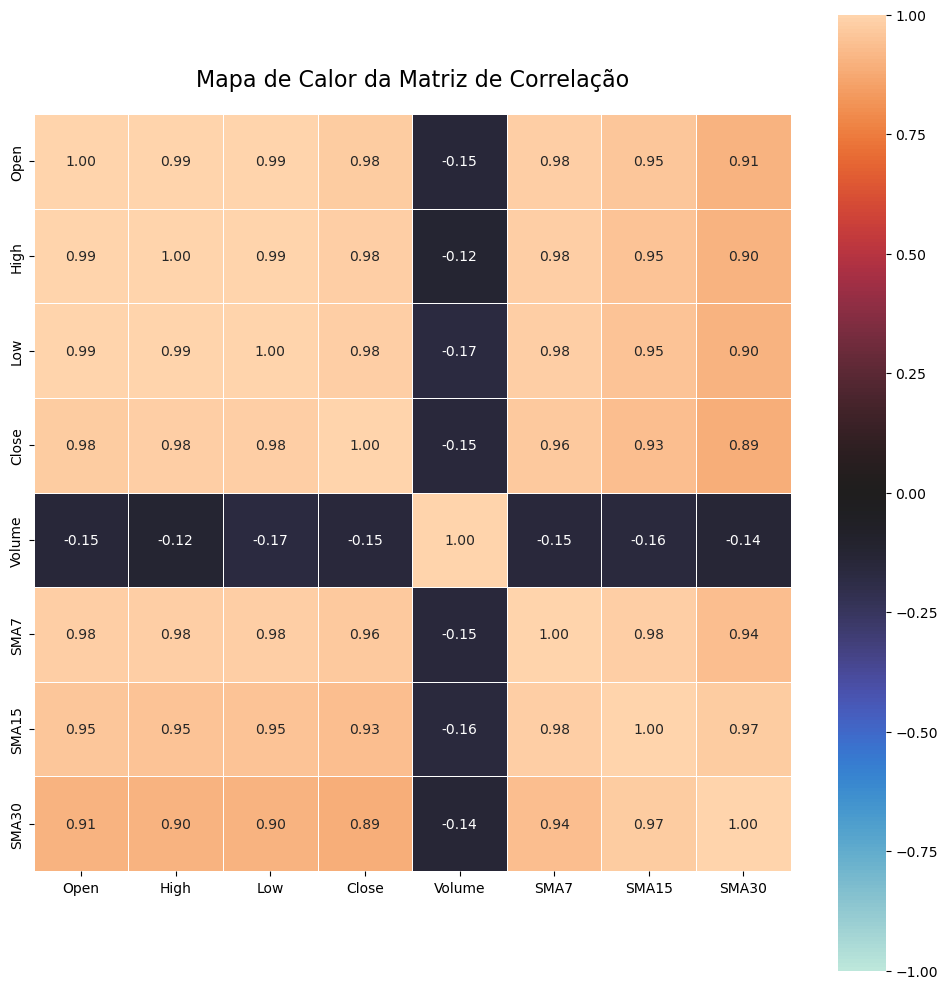

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(ticket.corr(), annot=True, vmin=-1, vmax=1,  center=0,  square=True,  linewidths=0.5,  fmt='.2f')
plt.title('Mapa de Calor da Matriz de Correla√ß√£o', fontsize=16, pad=20)
plt.tight_layout()

plt.show()

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `hist` da **classe** `ticket` para gerar um histograma. O **par√¢metro** `figsize` √© usado para definir o tamanho da figura gerada, com dimens√µes de 20 por 20 unidades.

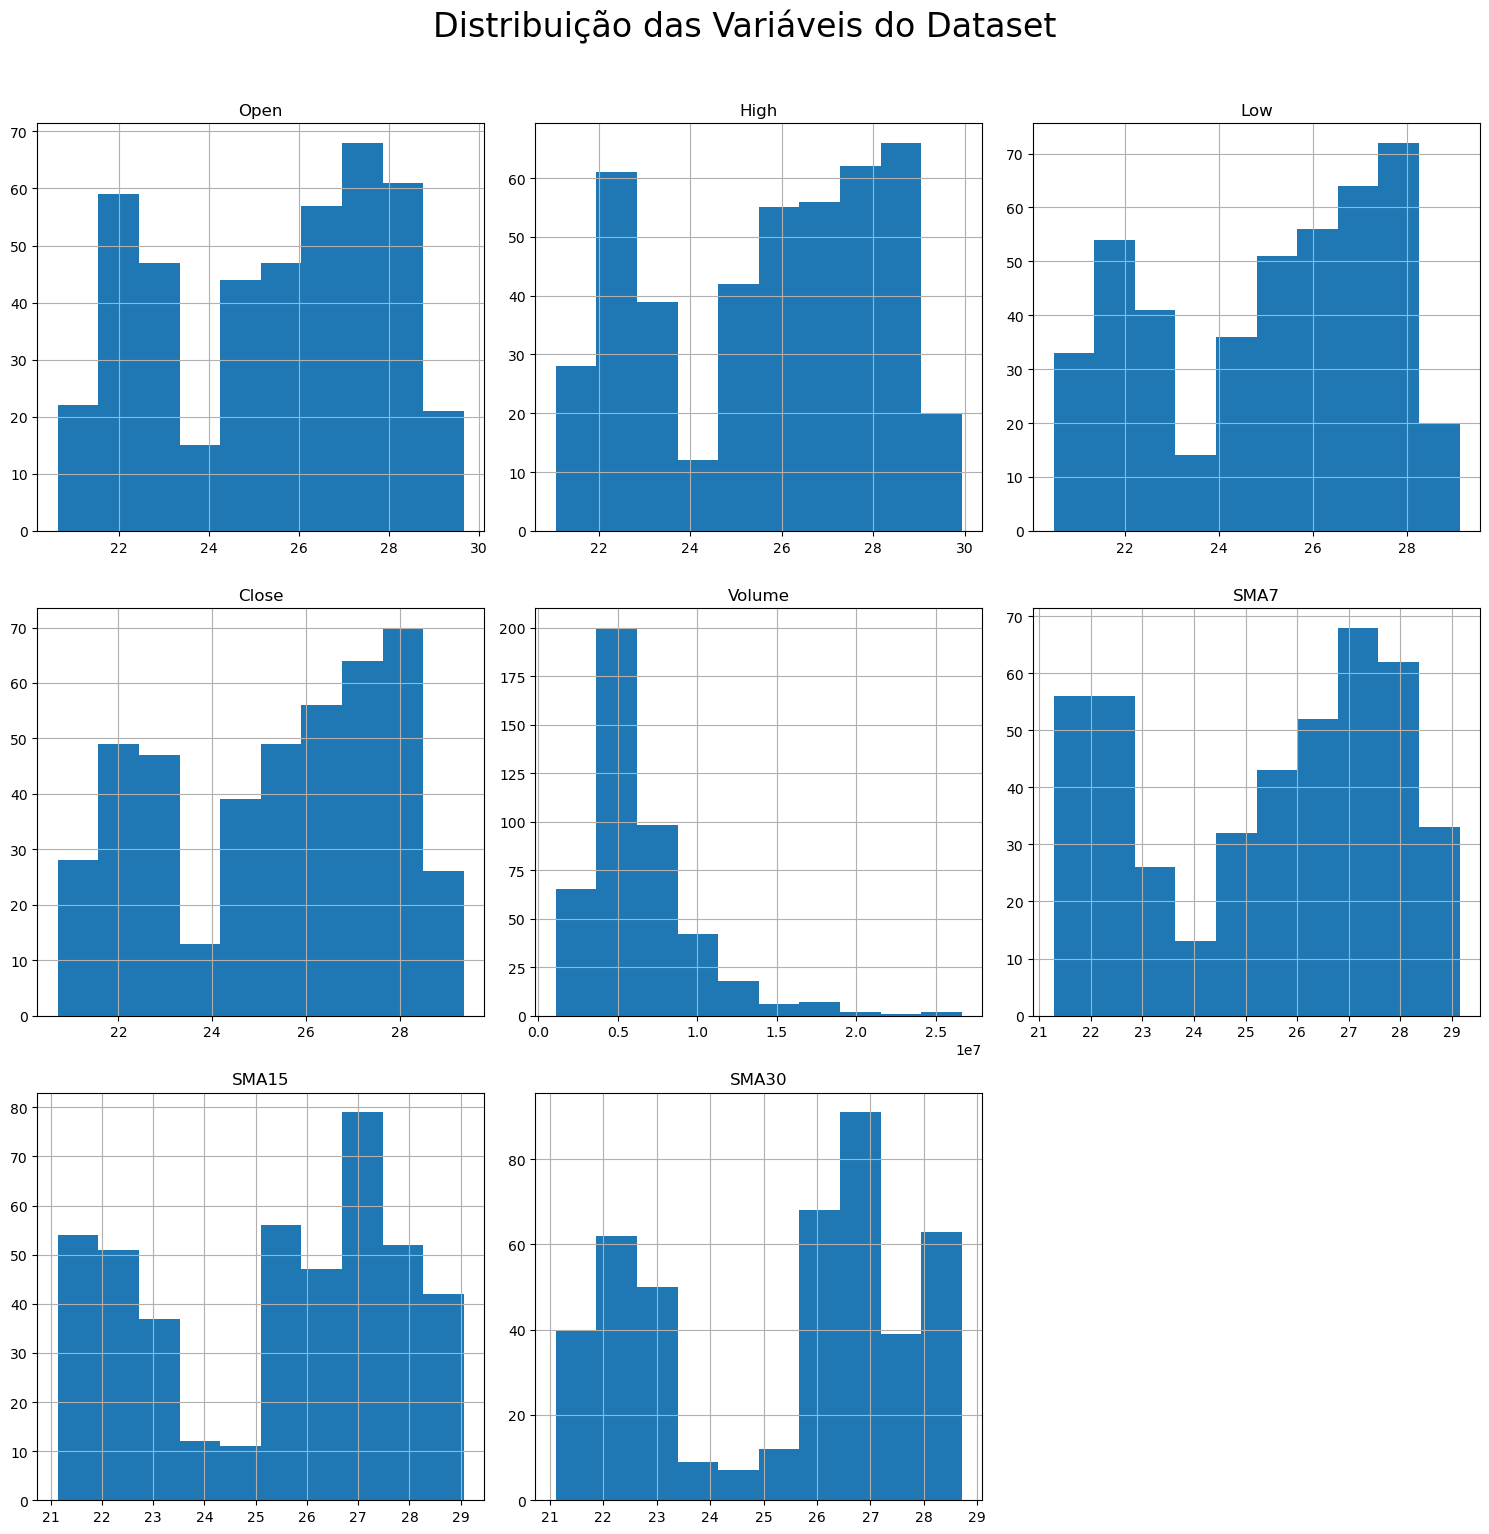

In [12]:
fig = ticket.hist(figsize=(15,15))
plt.suptitle("Distribui√ß√£o das Vari√°veis do Dataset", fontsize=24, y=1.02)
plt.tight_layout()

plt.show()

No c√≥digo a seguir, est√° sendo utilizada a **biblioteca** `seaborn` para criar um gr√°fico de pares com a **fun√ß√£o** `pairplot` aplicada ao **par√¢metro** `ticket`, que representa um DataFrame contendo os dados a serem visualizados. A **fun√ß√£o** `pairplot` gera uma matriz de gr√°ficos de dispers√£o para cada par de vari√°veis no DataFrame, ajudando a identificar rela√ß√µes e padr√µes entre as vari√°veis.

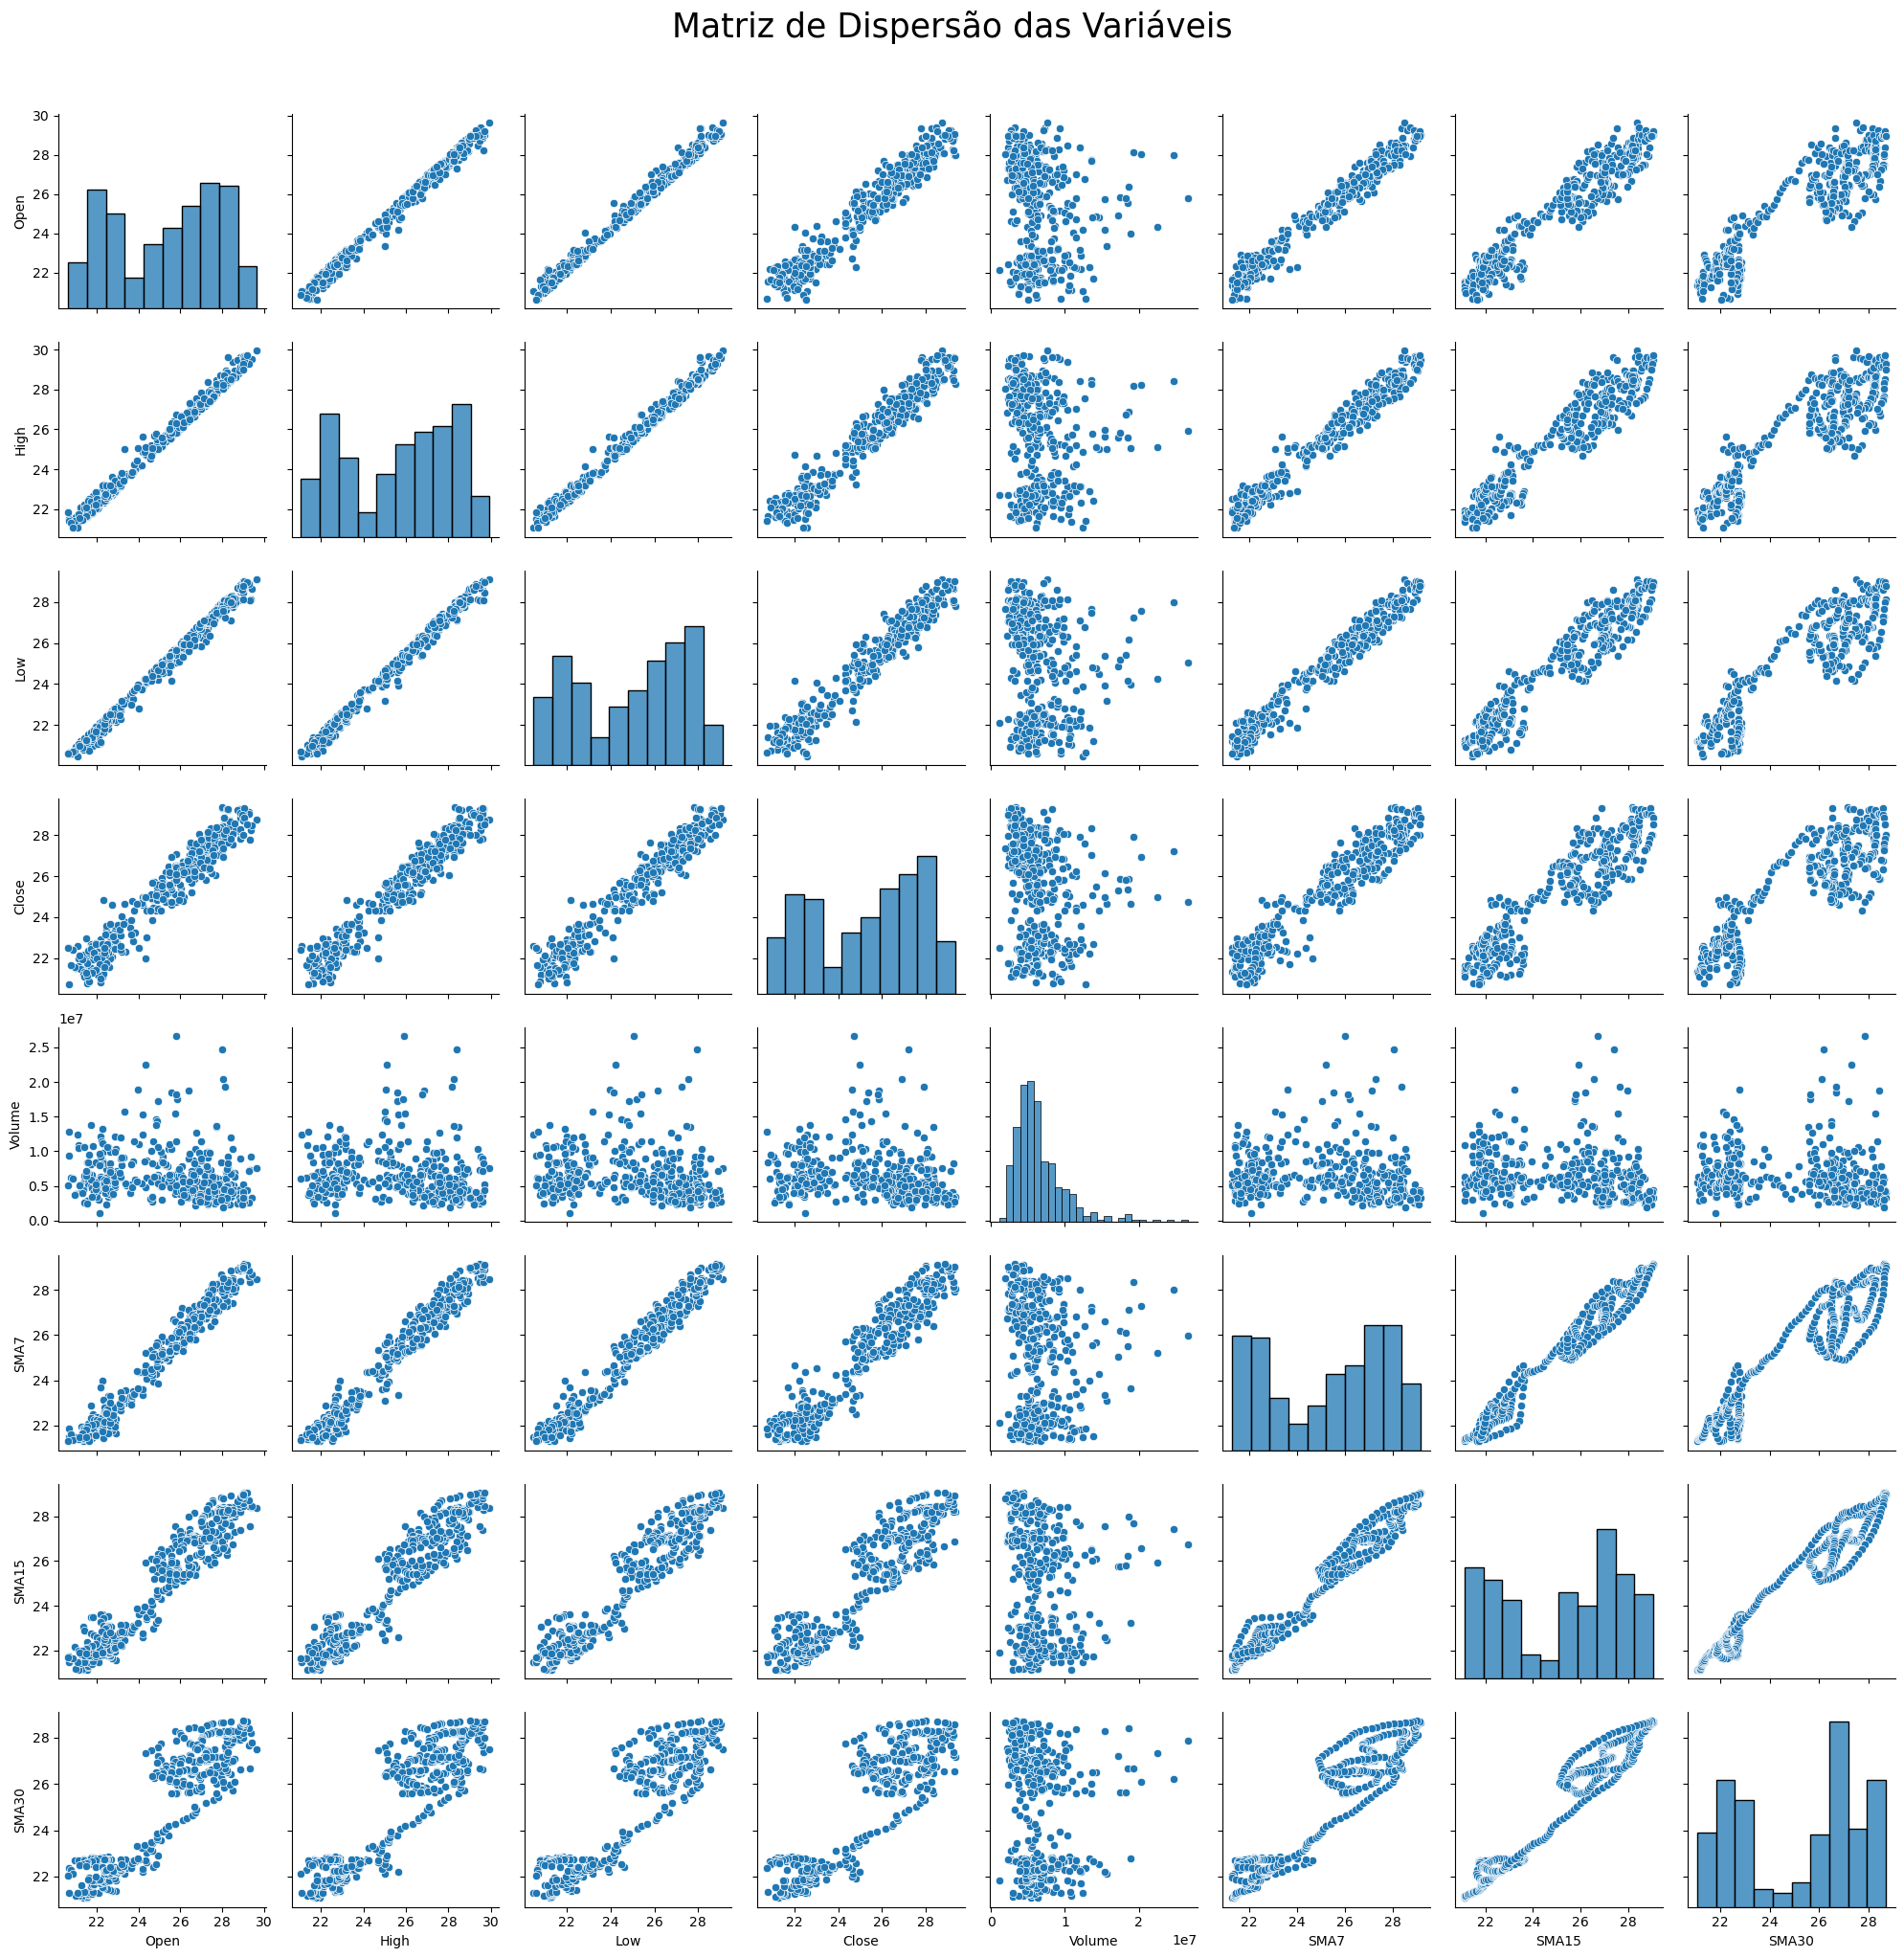

In [17]:
g = sns.pairplot(ticket)
g.fig.suptitle("Matriz de Dispers√£o das Vari√°veis", fontsize=25, y=1.02)
plt.tight_layout()

plt.show()

No c√≥digo a seguir, est√° sendo utilizada a **biblioteca** `seaborn` (abreviada como `sns`) para gerar um histograma com a **fun√ß√£o** `histplot`. O **par√¢metro** `ticket['Close']` indica que os dados para o histograma est√£o sendo extra√≠dos da coluna 'Close' do **dataframe** `ticket`, presumivelmente contendo valores num√©ricos que representam o fechamento de um determinado item ou ativo em diferentes momentos.

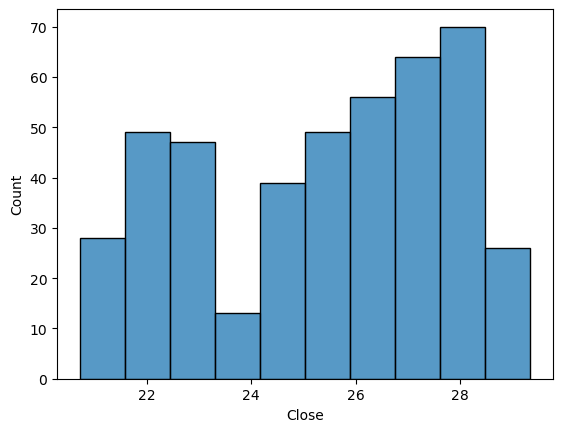

In [13]:
sns.histplot(ticket['Close']);

## <strong><font color=orange> Utilizando `PyCaret` para criar Modelo de Machine Learning </font></strong>

<center><img alt="" class="bg mk ml c" width="382" height="56" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:420/1*-_RmJIzCCL_GqhcR5bgowQ.png"></center>

In [ ]:
# Usar esse comando SE precisar atualizar o m√≥dulo
%pip install --upgrade pycaret

### <strong> Importar a biblioteca de Regress√£o do `Pycaret` e visualizar a coluna alvo usando a fun√ß√£o `setup` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **biblioteca** `pycaret.regression` para realizar tarefas de regress√£o. Primeiramente, a biblioteca √© importada com `from pycaret.regression import *`, o que permite acesso a todas as funcionalidades dispon√≠veis na mesma. Em seguida, a **fun√ß√£o** `setup` √© chamada para configurar o ambiente de modelagem, recebendo como **par√¢metros** o **dataframe** `ticket`, o nome da [coluna alvo] `target='Close'`, um **session_id** (usado para garantir a reprodutibilidade dos resultados com a mesmas informa√ß√µes) definido como `123`, e a op√ß√£o `remove_multicollinearity` definida como `False` para n√£o remover colunas com alta correla√ß√£o.

In [14]:
from pycaret.regression import *

setup(data = ticket, target = 'Close', session_id = 123, remove_multicollinearity=False);

### <strong> Comparar os modelos e informar os tr√™s melhores escolhidos usando a fun√ß√£o `compare_models` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `compare_models` da **biblioteca** PyCaret para comparar diferentes modelos de machine learning e selecionar os tr√™s melhores, especificados pelo **par√¢metro** `n_select=3`. Em seguida, os tr√™s melhores modelos s√£o exibidos usando a **fun√ß√£o** `display`. Este processo automatiza a compara√ß√£o de modelos, permitindo ao usu√°rio identificar rapidamente os melhores candidatos para o problema em quest√£o.

In [15]:
top3_models = compare_models(n_select=3)
display(top3_models)

[LinearRegression(n_jobs=-1), Ridge(random_state=123), BayesianRidge()]

#### <strong><font color=red>Observa√ß√µes e Defini√ß√µes de Cada M√©trica</font></strong>

A tabela acima organiza o *ranking* de modelos se baseando no coeficiente de determina√ß√£o R¬≤, que √© uma m√©trica muito utilizada para observar o qu√£o bem o modelo se ajusta ao conjunto de dados utilizado. Com isso, podemos ver que `MAE`, `MSE`, `RMSE`, `R2`, `RMSLE` e `MAPE` s√£o todas m√©tricas utilizadas para avaliar a acur√°cia do nosso modelo:<br>

- **MAE (Mean Absolute Error)**: `MAE` √© a m√©dia dos valores absolutos das diferen√ßas entre os valores previstos e reais. *Menor valor indica melhor performance.* üîª
- **MSE (Mean Squared Error)**: `MSE` √© a m√©dia dos quadrados das diferen√ßas entre os valores previstos e reais. *Menor valor indica melhor performance.* üîª
- **RMSE (Root Mean Squared Error)**: `RMSE` √© a raiz quadrada do MSE. *Menor valor indica melhor performance.* üîª
- **R¬≤ (Coefficient of Determination)**: `R¬≤` varia de 0 a 1, sendo 1 o ideal, indicando que a vari√¢ncia dos dados √© completamente explicada pelo modelo. *Quanto maior, melhor performance.* üî∫
- **RMSLE (Root Mean Squared Logarithmic Error)**: `RMSLE` √© usado principalmente em previs√µes de s√©ries temporais ou quando os valores s√£o exponencialmente distribu√≠dos. *Menor valor indica melhor performance.* üîª
- **MAPE (Mean Absolute Percentage Error)**: `MAPE` mede a m√©dia dos erros percentuais absolutos. *Menor valor indica melhor performance.* üîª<br><hr>

### <strong> Testar os 3 melhores modelos 10 vezes e analisar as m√©dias das m√©tricas de `acur√°cia` </strong>

No c√≥digo a seguir, est√° sendo utilizado a **fun√ß√£o** `create_model` com diferentes par√¢metros para criar os 3 melhores modelos com o par√¢metro `fold=10`. Em seguida, cada modelo criado √© exibido utilizando a **fun√ß√£o** `display`. O par√¢metro `fold=10` sugere que a valida√ß√£o cruzada est√° sendo utilizada com 10 dobras para avaliar o desempenho dos modelos.

In [18]:
model_lr = create_model('lr', fold=10)
display(model_lr)

LinearRegression(n_jobs=-1)

In [19]:
model_ridge = create_model('ridge', fold=10)
display(model_ridge)

Ridge(random_state=123)

In [20]:
model_br = create_model('br', fold=10)
display(model_br)

BayesianRidge()

### <strong> Melhorar ainda mais a performance do modelo usando a fun√ß√£o `tune_model` </strong>

No c√≥digo a seguir, est√° sendo definida uma **biblioteca** `ridge_params` com um par√¢metro **par√¢metro** `alpha` que possui uma lista de valores espec√≠ficos. Em seguida, a fun√ß√£o **fun√ß√£o** `model_tune_model` √© utilizada para ajustar o modelo **modelo** `model_ridge`. O ajuste √© realizado com 1000 itera√ß√µes, otimizando o par√¢metro `RMSE` e utilizando a grade personalizada definida em `ridge_params`. Em seguida, cada modelo criado √© exibido utilizando a **fun√ß√£o** `display`.

In [21]:
model_tune_lr = tune_model(model_lr, n_iter=1000, optimize = 'RMSE')
display(model_tune_lr)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


LinearRegression(fit_intercept=False, n_jobs=-1)

In [23]:
ridge_params = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
model_tune_ridge = tune_model(model_ridge, n_iter=1000, optimize = 'RMSE', custom_grid = ridge_params)
display(model_tune_ridge)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Ridge(random_state=123)

In [24]:
model_tune_br = tune_model(model_br, n_iter=1000, optimize = 'RMSE')
display(model_tune_br)

Initiated  . . . . . . . . . . . . . . . . . .              12:02:43
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


BayesianRidge(alpha_1=0.3, alpha_2=0.0005, compute_score=True,
              fit_intercept=False, lambda_1=1e-07, lambda_2=0.3)

## <strong><font color=orange> An√°lises gr√°ficas </font></strong>

### <strong> Visualizar os erros do modelo escolhido usando a fun√ß√£o `plot_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `plot_model` para visualizar os erros de dois modelos diferentes. Esta **fun√ß√£o** faz parte da biblioteca `pycaret`, especializada em machine learning. O primeiro **par√¢metro**, `model_ridge`, representa um modelo de regress√£o Ridge previamente treinado. O segundo **par√¢metro**, `model_tune_ridge`, refere-se a uma vers√£o ajustada do mesmo modelo ap√≥s um processo de afina√ß√£o de hiperpar√¢metros. O **par√¢metro** `plot='error'` indica que o tipo de gr√°fico a ser gerado √© o de erros, o que ajuda na an√°lise da performance dos modelos comparando seus erros preditivos.

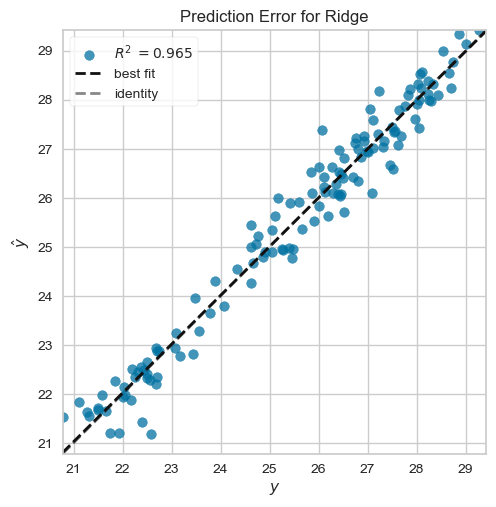

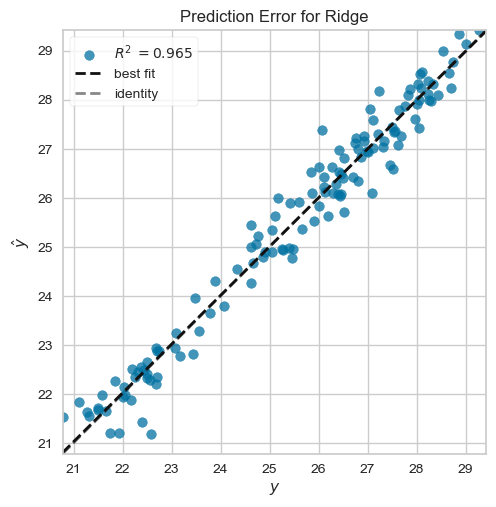

In [25]:
plot_model(model_ridge, plot='error')
plot_model(model_tune_ridge, plot='error')

### <strong> Avaliando 2 modelos de aprendizado de m√°quina usando a fun√ß√£o `evaluate_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `evaluate_model` para avaliar dois modelos de aprendizado de m√°quina. O primeiro modelo √© chamado `model_ridge`, enquanto o segundo √© `model_tune_ridge`. Ambos s√£o passados como **par√¢metros** para a **fun√ß√£o** `evaluate_model`, que provavelmente √© respons√°vel por realizar alguma an√°lise ou teste de desempenho nesses modelos. A diferen√ßa entre os dois modelos pode estar na forma como foram treinados ou ajustados; `model_ridge` pode representar um modelo de regress√£o ridge padr√£o, enquanto `model_tune_ridge` sugere que o modelo passou por algum processo de ajuste fino ou otimiza√ß√£o de hiperpar√¢metros. Esta avalia√ß√£o √© essencial para comparar o desempenho dos modelos e escolher o mais eficaz para o problema em quest√£o.

In [26]:
evaluate_model(model_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin‚Ä¶

In [27]:
evaluate_model(model_tune_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin‚Ä¶

### <strong> Visualizar a melhor `Feature` utilizada no modelo usando a fun√ß√£o `plot_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `plot_model` da **biblioteca** `pycaret`, que √© uma ferramenta de machine learning automatizada. O **par√¢metro** `model_tune_ridge` representa o modelo de regress√£o Ridge previamente ajustado e treinado. O **par√¢metro** `plot` √© configurado com o valor `'feature'`, indicando que o tipo de gr√°fico a ser gerado √© um gr√°fico de import√¢ncia de caracter√≠sticas. Este gr√°fico visualiza a import√¢ncia de cada vari√°vel de entrada no modelo de regress√£o Ridge ajustado, ajudando a entender quais caracter√≠sticas t√™m mais impacto na predi√ß√£o.

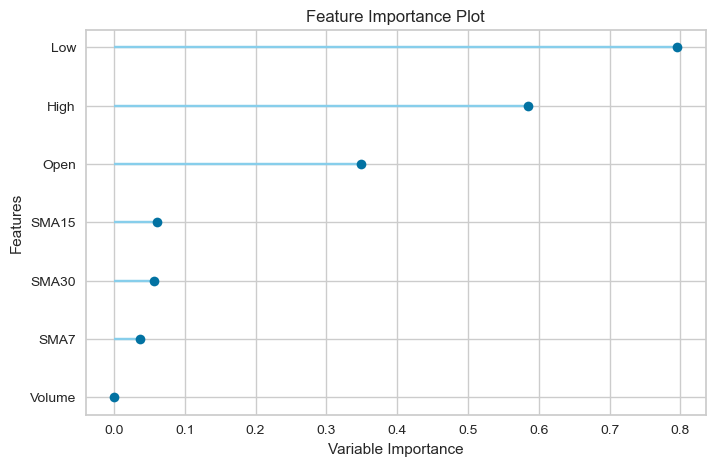

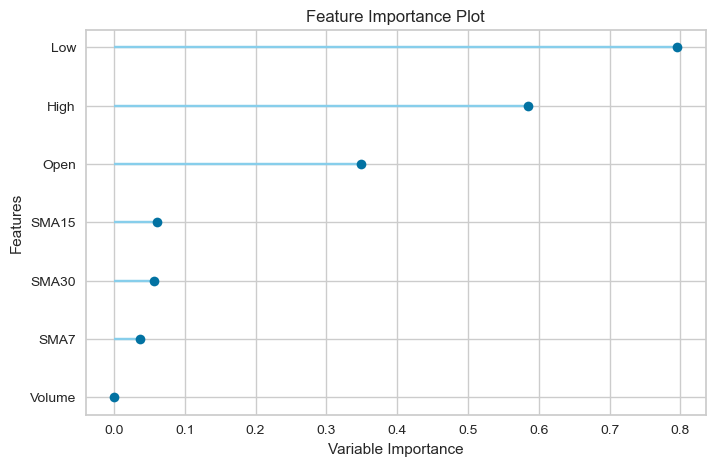

In [29]:
plot_model(model_tune_ridge, plot='feature')
plot_model(model_ridge, plot='feature')

### <strong> Testar os modelos criados com os dados de treinamento usando a fun√ß√£o `predict_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `predict_model` para fazer previs√µes com tr√™s modelos diferentes: `model_tune_lr`, `model_tune_ridge` e `model_tune_br`. A **fun√ß√£o** `predict_model`, que pertence a uma **biblioteca** de aprendizado de m√°quina, recebe como **par√¢metro** um modelo previamente ajustado e gera previs√µes baseadas nos dados fornecidos. O primeiro modelo, `model_tune_lr`, √© provavelmente um modelo de regress√£o linear ajustado; o segundo, `model_tune_ridge`, √© um modelo de regress√£o ridge, que adiciona uma penaliza√ß√£o L2 para evitar overfitting; e o terceiro, `model_tune_br`, √© um modelo de regress√£o bayesiana, que incorpora incertezas dos par√¢metros na previs√£o. Esses modelos s√£o utilizados para comparar diferentes t√©cnicas de regress√£o e avaliar a melhor abordagem para o conjunto de dados em quest√£o.

In [31]:
predict_model(model_tune_lr)

Open       High        Low    Volume       SMA7      SMA15  \
13   20.656178  21.491812  20.609230   9402224  21.450001  21.459999   
125  22.884779  23.423800  22.809126   9936160  22.799999  22.129999   
287  25.374834  25.741579  25.136946   5436400  25.270000  25.760000   
204  28.066525  28.383101  27.997272   4031100  28.299999  28.350000   
172  27.741621  28.452438  27.652769  13545900  27.260000  26.549999   
..         ...        ...        ...       ...        ...        ...   
318  28.834772  28.954130  28.645790   3354400  29.020000  28.530001   
151  24.294638  24.863153  24.275686   8482344  24.379999  23.940001   
157  25.421589  25.592459  24.586227  10274784  24.889999  24.600000   
260  26.622141  27.275080  26.572676   8727800  26.790001  26.969999   
372  26.457571  27.332857  26.417784   9622100  26.049999  26.150000   

         SMA30      Close  prediction_label  
13   21.280001  22.580952         21.165372  
125  22.299999  23.092821         23.242262  
287  26.520000  25.910082         25.533388  
204  28.209999  27.868664         28.264736  
172  25.580000  27.830473         28.154549  
..         ...        ...               ...  
318  28.100000  28.735308         28.790346  
151  23.360001  24.671665         24.665380  
157  23.770000  25.051374         24.875894  
260  26.950001  27.116791         27.062852  
372  25.650000  26.805696         27.038718  

[133 rows x 9 columns]

In [32]:
predict_model(model_tune_ridge)

Open       High        Low    Volume       SMA7      SMA15  \
13   20.656178  21.491812  20.609230   9402224  21.450001  21.459999   
125  22.884779  23.423800  22.809126   9936160  22.799999  22.129999   
287  25.374834  25.741579  25.136946   5436400  25.270000  25.760000   
204  28.066525  28.383101  27.997272   4031100  28.299999  28.350000   
172  27.741621  28.452438  27.652769  13545900  27.260000  26.549999   
..         ...        ...        ...       ...        ...        ...   
318  28.834772  28.954130  28.645790   3354400  29.020000  28.530001   
151  24.294638  24.863153  24.275686   8482344  24.379999  23.940001   
157  25.421589  25.592459  24.586227  10274784  24.889999  24.600000   
260  26.622141  27.275080  26.572676   8727800  26.790001  26.969999   
372  26.457571  27.332857  26.417784   9622100  26.049999  26.150000   

         SMA30      Close  prediction_label  
13   21.280001  22.580952         21.181612  
125  22.299999  23.092821         23.250501  
287  26.520000  25.910082         25.521731  
204  28.209999  27.868664         28.230698  
172  25.580000  27.830473         28.097717  
..         ...        ...               ...  
318  28.100000  28.735308         28.769442  
151  23.360001  24.671665         24.660425  
157  23.770000  25.051374         24.902703  
260  26.950001  27.116791         27.015951  
372  25.650000  26.805696         26.986593  

[133 rows x 9 columns]

In [34]:
predict_model(model_tune_br)

Open       High        Low    Volume       SMA7      SMA15  \
13   20.656178  21.491812  20.609230   9402224  21.450001  21.459999   
125  22.884779  23.423800  22.809126   9936160  22.799999  22.129999   
287  25.374834  25.741579  25.136946   5436400  25.270000  25.760000   
204  28.066525  28.383101  27.997272   4031100  28.299999  28.350000   
172  27.741621  28.452438  27.652769  13545900  27.260000  26.549999   
..         ...        ...        ...       ...        ...        ...   
318  28.834772  28.954130  28.645790   3354400  29.020000  28.530001   
151  24.294638  24.863153  24.275686   8482344  24.379999  23.940001   
157  25.421589  25.592459  24.586227  10274784  24.889999  24.600000   
260  26.622141  27.275080  26.572676   8727800  26.790001  26.969999   
372  26.457571  27.332857  26.417784   9622100  26.049999  26.150000   

         SMA30      Close  prediction_label  
13   21.280001  22.580952         21.148519  
125  22.299999  23.092821         23.230906  
287  26.520000  25.910082         25.529187  
204  28.209999  27.868664         28.257836  
172  25.580000  27.830473         28.138340  
..         ...        ...               ...  
318  28.100000  28.735308         28.791673  
151  23.360001  24.671665         24.651992  
157  23.770000  25.051374         24.892564  
260  26.950001  27.116791         27.047622  
372  25.650000  26.805696         27.018265  

[133 rows x 9 columns]

#### <strong><font color=red>Observa√ß√µes e An√°lises dos Modelos</font></strong>

Qual modelo a seguir devo escolher para prever o fechamento de uma a√ß√£o e qual a justificativa da escolha? Deve-se escolher o modelo **Linear Regression** para prever o fechamento de uma a√ß√£o. A justificativa para esta escolha √© baseada no desempenho dos modelos nas m√©tricas apresentadas:

- **MAE (Mean Absolute Error)**: O Linear Regression tem o menor MAE entre os tr√™s modelos, indicando que, em m√©dia, suas previs√µes est√£o mais pr√≥ximas dos valores reais.
  
- **MSE (Mean Squared Error)** e **RMSE (Root Mean Squared Error)**: Embora o Linear Regression n√£o tenha o menor MSE e RMSE, a diferen√ßa em rela√ß√£o aos outros modelos √© muito pequena. Essas m√©tricas penalizam erros maiores, ent√£o uma diferen√ßa pequena j√° sugere um bom desempenho.

- **R2 (Coefficient of Determination)**: O Linear Regression tem o maior R2, o que significa que ele explica uma maior propor√ß√£o da varia√ß√£o nos dados de fechamento da a√ß√£o em compara√ß√£o com os outros modelos.

- **RMSLE (Root Mean Squared Logarithmic Error)** e **MAPE (Mean Absolute Percentage Error)**: O Linear Regression tem o menor RMSLE e MAPE, indicando que ele √© mais preciso ao prever varia√ß√µes percentuais nos dados de fechamento da a√ß√£o.

Portanto, considerando todas essas m√©tricas, o Linear Regression apresenta um equil√≠brio entre precis√£o nas previs√µes e capacidade de explicar a variabilidade dos dados, tornando-o a escolha mais adequada para esta tarefa.<br><hr>

### <strong> Finalizar o modelo com a fun√ß√£o `finalize_model` e fazer a previs√£o com a fun√ß√£o `predict_model` </strong>

No c√≥digo a seguir, est√° sendo utilizado um modelo de aprendizado de m√°quina. A fun√ß√£o **`finalize_model`** (Fun√ß√£o) √© usada para finalizar o ajuste de um modelo pr√©-treinado, **`model_tune_lr`** (Par√¢metro). Em seguida, o modelo finalizado, **`final_lr_model`** (Par√¢metro), √© usado para fazer previs√µes com a fun√ß√£o **`predict_model`** (Fun√ß√£o), onde o par√¢metro **`data`** √© definido como **`ticket_text`** (Par√¢metro). O resultado das previs√µes √© armazenado na vari√°vel **`predict`** (Par√¢metro). Finalmente, o resultado das previs√µes √© exibido usando a fun√ß√£o **`display`** (Fun√ß√£o).

In [35]:
final_lr_model = finalize_model(model_tune_lr)
predict = predict_model(final_lr_model, data = ticket_test)
display(predict)

Open       High        Low    Volume       SMA7      SMA15  \
0   25.744785  26.253891  25.435328   6986900  25.209999  25.110001   
1   26.134102  26.323769  25.954416   9733400  25.309999  25.190001   
2   26.054241  26.363697  25.974380   6103800  25.500000  25.280001   
3   26.253891  26.643208  26.094172   3490000  25.790001  25.379999   
4   26.313786  26.403627  25.395399   8547600  25.920000  25.400000   
5   25.255644  25.694872  25.215715   2775200  26.040001  25.430000   
6   25.634977  25.634977  25.185766   3496200  25.969999  25.450001   
7   25.455294  25.824646  25.305557   5888600  25.889999  25.510000   
8   25.879999  25.879999  25.020000   4933900  25.719999  25.530001   
9   25.250000  25.600000  25.200001   4429700  25.570000  25.500000   
10  25.389999  25.469999  25.090000   2898500  25.379999  25.510000   
11  25.030001  25.469999  24.959999   6160600  25.309999  25.559999   
12  25.240000  25.400000  25.000000   3874700  25.250000  25.590000   
13  25.200001  25.500000  25.170000   6296100  25.270000  25.629999   
14  25.360001  25.900000  25.309999   3513800  25.299999  25.629999   
15  25.910000  25.910000  25.440001   2995200  25.400000  25.610001   
16  25.799999  26.090000  25.590000   3843900  25.450001  25.559999   
17  25.750000  25.840000  25.330000   3645100  25.510000  25.510000   
18  25.370001  25.750000  25.330000   4902100  25.580000  25.459999   
19  25.889999  26.230000  25.600000   6640900  25.670000  25.469999   
20  25.730000  26.200001  25.670000   2999900  25.770000  25.500000   
21  25.920000  26.410000  25.910000   5702500  25.809999  25.559999   
22  25.920000  26.490000  25.770000  10181900  25.860001  25.600000   
23  26.200001  26.350000  25.910000  10265700  25.920000  25.660000   
24  26.000000  27.040001  26.000000   6937000  26.120001  25.770000   
25  27.120001  27.600000  27.110001   5952900  26.350000  25.910000   
26  27.180000  27.620001  26.930000   3283800  26.610001  26.070000   
27  27.690001  27.959999  27.490000   5383200  26.820000  26.240000   
28  27.559999  28.059999  27.370001   3446600  27.049999  26.389999   
29  27.719999  27.920000  27.580000    427500  27.280001  26.520000   

        SMA30      Close  prediction_label  
0   25.830000  26.134102         25.959958  
1   25.830000  26.323769         26.179811  
2   25.809999  26.363697         26.264544  
3   25.790001  26.493471         26.469615  
4   25.719999  25.634977         25.737668  
5   25.660000  25.555119         25.552029  
6   25.570000  25.275608         25.311862  
7   25.510000  25.595047         25.602318  
8   25.440001  25.139999         25.268680  
9   25.400000  25.290001         25.461568  
10  25.370001  25.150000         25.238817  
11  25.340000  25.190001         25.287226  
12  25.320000  25.139999         25.181724  
13  25.309999  25.410000         25.377017  
14  25.340000  25.760000         25.726325  
15  25.360001  25.879999         25.584503  
16  25.379999  25.590000         25.871204  
17  25.400000  25.610001         25.523630  
18  25.420000  25.660000         25.614372  
19  25.430000  25.770000         25.929014  
20  25.469999  26.100000         26.040772  
21  25.500000  26.090000         26.267873  
22  25.549999  26.170000         26.207711  
23  25.590000  26.049999         26.071917  
24  25.639999  27.000000         26.757734  
25  25.709999  27.299999         27.459466  
26  25.820000  27.549999         27.327076  
27  25.910000  27.600000         27.730283  
28  26.010000  27.670000         27.780835  
29  26.080000  27.770000         27.753781

### <strong> Salvar o modelo para utilizar com os dados novos usando a fun√ß√£o `save_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `save_model` para salvar um modelo de aprendizado de m√°quina. O primeiro **par√¢metro**, `final_lr_model`, representa o modelo final de regress√£o linear que foi treinado e ajustado, utilizando a **biblioteca** `PyCaret`, que √© uma ferramenta de automa√ß√£o de machine learning. O segundo **par√¢metro**, `'Modelo Final LR PyCaret'`, √© uma string que especifica o nome do arquivo em que o modelo ser√° salvo. Assim, o modelo treinado pode ser armazenado para uso posterior, evitando a necessidade de re-treinamento.

In [36]:
save_model(final_lr_model, 'Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low', 'Volume',
                                              'SMA7', 'SMA15', 'SMA30'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LinearRegression(fit_intercept=False, n_jobs=-1))]),
 'Modelo Final LR PyCaret.pkl')

### <strong> Buscar novos dados usando a fun√ß√£o `download` </strong>

No c√≥digo a seguir, est√° sendo utilizado a **biblioteca** `yfinance` para baixar dados hist√≥ricos de a√ß√µes. A **fun√ß√£o** `download` √© chamada com o **par√¢metro** `'RADL3.SA'`, que especifica o c√≥digo do ativo da Raia Drogasil na bolsa de valores brasileira, e o **par√¢metro** `period='3mo'`, que define o per√≠odo de tr√™s meses para os dados. Em seguida, a **fun√ß√£o** `display` √© utilizada para exibir o conte√∫do do **dataframe** `new_ticket` que cont√©m os dados baixados.

In [37]:
new_ticket = yf.download('RADL3.SA', period='3mo')
display(new_ticket)

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2024-05-02  26.160000  26.160000  25.370001  25.639999  25.595047  5646800
2024-05-03  25.820000  26.340000  25.719999  26.240000  26.193996  5050900
2024-05-06  26.200001  26.379999  25.990000  26.330000  26.283838  3734800
2024-05-07  26.490000  26.530001  25.980000  26.160000  26.114136  5626900
2024-05-08  26.160000  26.500000  25.389999  26.240000  26.193996  8217700
...               ...        ...        ...        ...        ...      ...
2024-07-29  27.120001  27.600000  27.110001  27.299999  27.299999  5952900
2024-07-30  27.180000  27.620001  26.930000  27.549999  27.549999  3283800
2024-07-31  27.690001  27.959999  27.490000  27.600000  27.600000  5383200
2024-08-01  27.559999  28.059999  27.370001  27.670000  27.670000  3446600
2024-08-02  27.719999  27.920000  27.580000  27.740000  27.740000   513800

[66 rows x 6 columns]

### <strong> Refazer os tratamentos dos novos dados usando as fun√ß√µes `drop`, `reset_index` e `rolling` </strong>

No c√≥digo a seguir, est√° sendo realizada a manipula√ß√£o de um *DataFrame* utilizando a **biblioteca** *Pandas* para calcular m√©dias m√≥veis simples (SMAs) sobre os pre√ßos de fechamento de a√ß√µes. Primeiramente, a coluna 'Adj Close' √© removida do *DataFrame* `new_ticket` com a **fun√ß√£o** `drop()`, especificando o **par√¢metro** `axis=1` para indicar que a opera√ß√£o deve ser feita em colunas. Em seguida, os √≠ndices do *DataFrame* s√£o redefinidos com a **fun√ß√£o** `reset_index()`, usando `drop=True` para descartar o √≠ndice antigo e `inplace=True` para aplicar a mudan√ßa diretamente no objeto `new_ticket`. Tr√™s novas colunas s√£o criadas para armazenar as m√©dias m√≥veis simples de 7, 15 e 30 dias sobre os pre√ßos de fechamento, utilizando a **fun√ß√£o** `rolling()` para calcular a m√©dia dentro das janelas de tempo especificadas, seguida de `mean()` para calcular a m√©dia e `round(2)` para arredondar o resultado para duas casas decimais. Finalmente, o *DataFrame* atualizado √© exibido utilizando a **fun√ß√£o** `display()`.

In [38]:
new_ticket = new_ticket.drop('Adj Close', axis=1)
new_ticket.reset_index(drop=True, inplace=True)

new_ticket['SMA7'] = new_ticket['Close'].rolling(window=7).mean().round(2)
new_ticket['SMA15'] = new_ticket['Close'].rolling(window=15).mean().round(2)
new_ticket['SMA30'] = new_ticket['Close'].rolling(window=30).mean().round(2)

display(new_ticket)

Open       High        Low      Close   Volume   SMA7  SMA15  SMA30
0   26.160000  26.160000  25.370001  25.639999  5646800    NaN    NaN    NaN
1   25.820000  26.340000  25.719999  26.240000  5050900    NaN    NaN    NaN
2   26.200001  26.379999  25.990000  26.330000  3734800    NaN    NaN    NaN
3   26.490000  26.530001  25.980000  26.160000  5626900    NaN    NaN    NaN
4   26.160000  26.500000  25.389999  26.240000  8217700    NaN    NaN    NaN
..        ...        ...        ...        ...      ...    ...    ...    ...
61  27.120001  27.600000  27.110001  27.299999  5952900  26.35  25.91  25.73
62  27.180000  27.620001  26.930000  27.549999  3283800  26.61  26.07  25.83
63  27.690001  27.959999  27.490000  27.600000  5383200  26.82  26.24  25.93
64  27.559999  28.059999  27.370001  27.670000  3446600  27.05  26.39  26.02
65  27.719999  27.920000  27.580000  27.740000   513800  27.27  26.52  26.09

[66 rows x 8 columns]

### <strong> Obter o √∫ltimo registro dos dados usando a fun√ß√£o `tail(1)` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `tail` da **biblioteca** `pandas` para obter o √∫ltimo registro do **DataFrame** `new_ticket`, atribuindo-o de volta √† vari√°vel `new_ticket`. Em seguida, a **fun√ß√£o** `display`, da **biblioteca** `IPython.display`, √© usada para exibir o conte√∫do de `new_ticket`.

In [39]:
new_ticket = new_ticket.tail(1)
display(new_ticket)

Open   High    Low  Close  Volume   SMA7  SMA15  SMA30
65  27.719999  27.92  27.58  27.74  513800  27.27  26.52  26.09

### <strong> Carregar um modelo previamente treinado usando a fun√ß√£o `load_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `load_model` para carregar um modelo de aprendizado de m√°quina previamente treinado e salvo com o nome 'Modelo Final LR PyCaret'. A **vari√°vel** `saved_final_ticket_model` armazena este modelo carregado. A **fun√ß√£o** `load_model` faz parte da **biblioteca** PyCaret, que √© uma **biblioteca** de aprendizado de m√°quina que facilita a cria√ß√£o e a implementa√ß√£o de modelos de machine learning.

In [40]:
saved_final_ticket_model = load_model('Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Loaded


### <strong> Realizar uma previs√£o com novos dados usando a fun√ß√£o `predict_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `predict_model` da **biblioteca** `pycaret` para realizar uma previs√£o com o **modelo** `saved_final_ticket_model`, utilizando os dados contidos no **par√¢metro** `data=new_ticket`. O resultado da previs√£o √© armazenado na vari√°vel `new_prediction`, e em seguida, a **fun√ß√£o** `head()` √© chamada para exibir as primeiras linhas do resultado da previs√£o.

In [41]:
new_prediction = predict_model(saved_final_ticket_model, data=new_ticket)
new_prediction.head()

Open   High    Low  Volume   SMA7  SMA15  SMA30  Close  \
65  27.719999  27.92  27.58  513800  27.27  26.52  26.09  27.74   

    prediction_label  
65         27.754459